In [19]:
import os
import random
from PIL import Image, ImageFilter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models, optimizers
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)

random.seed(seed_value)
np.random.seed(seed_value)
set_seed(seed_value)


print("tensorflow version is:", tf.__version__)

temp0 = os.listdir(os.path.join(os.getcwd(), 'data', 'even_slices', '0'))
ct0 = [os.path.join(os.getcwd(), 'data', 'even_slices', '0/') + i for i in temp0]

temp1 = os.listdir(os.path.join(os.getcwd(), 'data', 'even_slices', '1'))
ct1 = [os.path.join(os.getcwd(), 'data', 'even_slices', '1/') + i for i in temp1]

temp2 = os.listdir(os.path.join(os.getcwd(), 'data', 'even_slices', '2'))
ct2 = [os.path.join(os.getcwd(), 'data', 'even_slices', '2/') + i for i in temp2]

temp3 = os.listdir(os.path.join(os.getcwd(), 'data', 'even_slices', '3'))
ct3 = [os.path.join(os.getcwd(), 'data', 'even_slices', '3/') + i for i in temp3]


tensorflow version is: 2.8.0


In [10]:
print("Total class 0 images:", len(ct0))
print("Total class 1 images:", len(ct1))
print("Total class 2 images:", len(ct2))
print("Total class 3 images:", len(ct3))

Total class 0 images: 254
Total class 1 images: 684
Total class 2 images: 125
Total class 3 images: 45


In [13]:
all_files = np.concatenate((ct0, ct1, ct2, ct3),axis=0)
all_labels = [int(all_files[i][-16]) for i in range(len(all_files))]

# check that there's 72 slices per image
# all_slices = [np.shape(np.load(i))[0] for i in all_files]
# print(f'Maximum is {np.max(all_slices)}, minimum is {np.min(all_slices)}, median is {np.median(all_slices)}')

In [15]:
batch_size = 16
img_height = 512
img_width = 512

train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(os.getcwd(), 'data', 'even_slices'),
    validation_split=0.2,
    subset='training',
    seed=seed_value,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1108 files belonging to 4 classes.
Using 887 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  os.path.join(os.getcwd(), 'data', 'even_slices'),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1108 files belonging to 4 classes.
Using 221 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3']


In [26]:
num_classes = len(class_names)

model = Sequential([
  layers.Flatten(input_shape=(img_height, img_width,3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 786432)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               100663424 
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 100,663,940
Trainable params: 100,663,940
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
56/56 [==============================] - 19s 317ms/step - loss: 49910.6484 - accuracy: 0.4318 - val_loss: 18872.3652 - val_accuracy: 0.6516
Epoch 2/10
56/56 [==============================] - 17s 310ms/step - loss: 13118.2764 - accuracy: 0.4870 - val_loss: 5758.6538 - val_accuracy: 0.3484
Epoch 3/10
56/56 [==============================] - 17s 307ms/step - loss: 10466.1250 - accuracy: 0.4803 - val_loss: 3536.5986 - val_accuracy: 0.6606
Epoch 4/10
56/56 [==============================] - 17s 308ms/step - loss: 10745.5312 - accuracy: 0.4667 - val_loss: 8026.5146 - val_accuracy: 0.6516
Epoch 5/10
56/56 [==============================] - 17s 309ms/step - loss: 6279.2603 - accuracy: 0.5163 - val_loss: 6689.0986 - val_accuracy: 0.6516
Epoch 6/10
56/56 [==============================] - 17s 308ms/step - loss: 6601.3682 - accuracy: 0.5141 - val_loss: 8028.3369 - val_accuracy: 0.2081
Epoch 7/10
56/56 [==============================] - 17s 309ms/step - loss: 3283.5618 - accuracy: 0.53

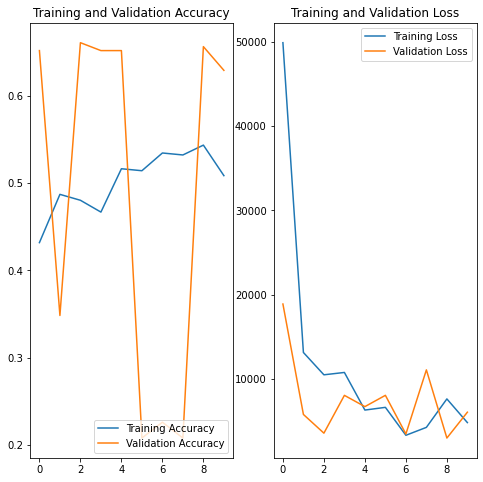

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()